<a href="https://colab.research.google.com/github/edco29/MLBankMarketing/blob/Version-1.1/Bank_Marketing_Guillermo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
bank =pd.read_csv('bank.csv', delimiter=";")
bank2 =pd.read_csv('bank-full.csv', delimiter=";")

In [3]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
bank.shape

(4521, 17)

In [5]:
bank['marital'].unique().tolist()

['married', 'single', 'divorced']

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Controlando valores nulos

In [8]:
bank.isnull().sum().sort_values(ascending=False)
bank.isnull().sum().any().any()

False

Asociamos las columnas por tipo

In [32]:
columnas_object=[]
columnas_numeric=[]
for y in bank.columns:
  if(bank[y].dtype == np.object):
    columnas_object.append(y)
  elif (bank[y].dtype == np.int64):
    columnas_numeric.append(y)

print(columnas_object)
print(columnas_numeric)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Analizamos el dato de "Estado civil" de los clientes

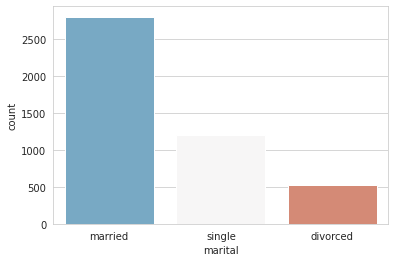

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='marital',data=bank,palette='RdBu_r')

Analizamos el dato de "Educacion"

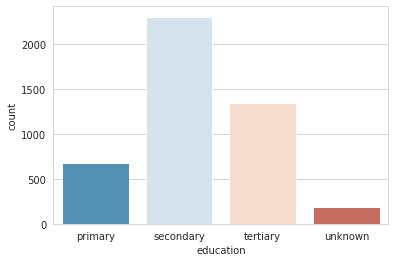

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='education',data=bank,palette='RdBu_r')

Analizamos el "Crédito incumplido"

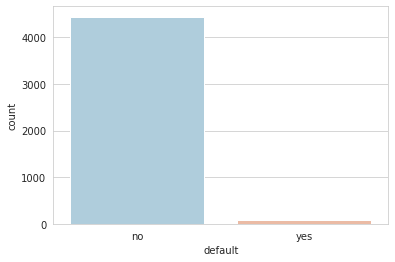

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='default',data=bank,palette='RdBu_r')

Analizamos el "Préstamos de vivienda"

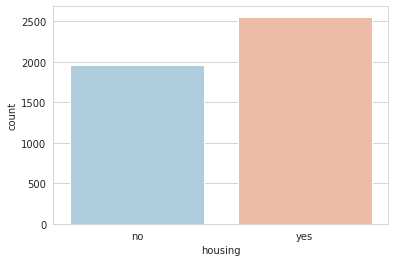

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='housing',data=bank,palette='RdBu_r')

Analizamos el "Préstamo personal"

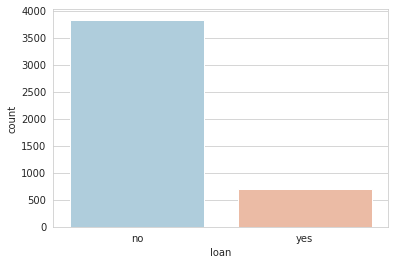

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='loan',data=bank,palette='RdBu_r')

Analizamos el "Tipo de comunicación"

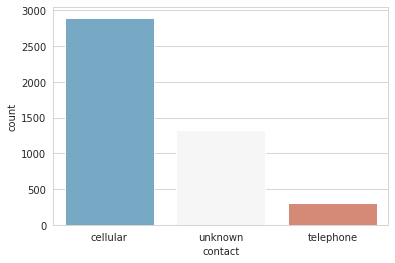

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='contact',data=bank,palette='RdBu_r')

analizamos el "Poutcome" de marketing anteriores

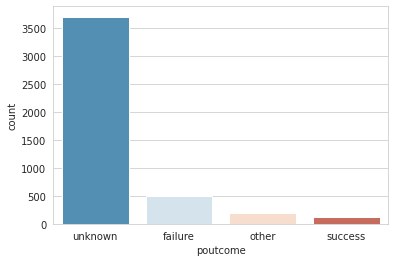

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='poutcome',data=bank,palette='RdBu_r')

Cantidad de clientes "Suscritos"

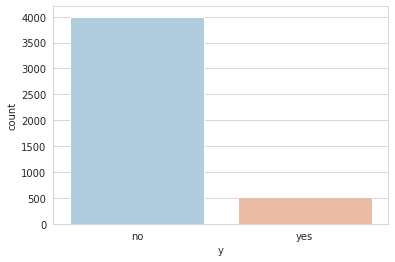

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='y',data=bank,palette='RdBu_r')

In [0]:
for y in bank.columns:
  if(bank[y].dtype == np.object):
    sns.set_style('whitegrid')
    sns.countplot(x=y,data=bank,palette='RdBu_r')
    plt.show()

Convertimos los datos categóricos a numéricos
